# <span style="color:darkblue"> Lecture 13a: Logistic Regression for Classification
 </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Import stats models


# This is used to create data matrices
import patsy

<font size = "5" >

### <span style="color:darkblue">  II. Example: Diffusion of microfinance </span>

Banerjee et al. (2013) explored the effects of a marketing <br>
campaign in rural villages in Karnataka, India, on the   <br>
probability of requesting a microfinance loan.

https://www.science.org/doi/10.1126/science.1236498

We will use their data today.

<font size = "5">

The outcome variable <br>

$\quad Y_i = \text{RequestLoan}_i $

<font size = "5">

The predictor vector:

$\quad X_i = \begin{bmatrix} 1 \\ \text{ReceivedInfo}_i \\ \text{OwnsHouse}_i \\ \text{HomeNumRooms}_i \end{bmatrix} $



# <span style="color:darkblue"> III. Prepare Data </span>


In [ ]:
dataset = pd.read_csv("data_raw/microfinance_data.csv")

<font size = "5">

Read microfinance data

In [3]:
dataset = pd.read_csv("data_raw/microfinance_data.csv")

In [ ]:
dataset

<font size = "5">

Create "y" and "X" matrices from a formula. This allows for:

- Interactions
- Factors
- Polynomials

In [4]:
y, X = \
    patsy.dmatrices('request_loan ~ 1',
                       dataset)
y = np.ravel(y)

<font size = "5">

Split the data into training and test

<font size = "3">

- "test_size" is a number between 0 and 1 that control the relative <br>
proportions of the training and test datasets.
- "random_state" is a seed that ensures that the training and test datasets <br>
can be replicated

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.5, random_state=42)

# <span style="color:darkblue"> IV. Fit model and evaluate classification accuracy </span>


<font size = "5">

Fit model on data using "Sk-learn"

In [6]:
model = LogisticRegression().fit(X_train,y_train)
model.coef_

array([[-0.77263838]])

<font size = "5">

Obtain vector of predicted probabilites on test set

得到测试集上的预测概率向量

Text(0.5, 1.0, 'Predicted Probabilities on Test Set')

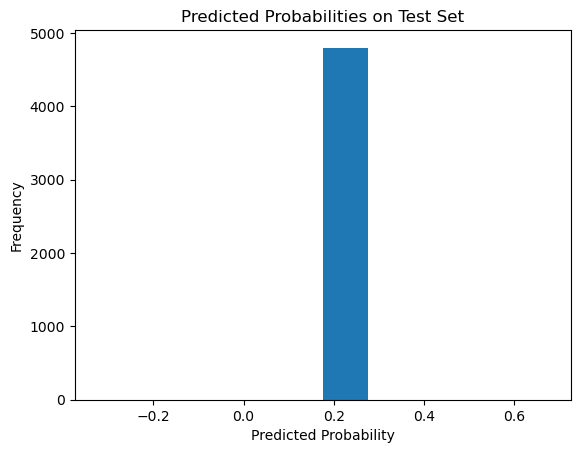

In [7]:
# Obtain predicted probabilities 获取预测概率
mat_probabilities = pd.DataFrame(model.predict_proba(X_test))

# Obtain probabilites for the event 1 获取事件1发生的概率
# (This is the second column of "mat_probabilities")
vec_probabilities = mat_probabilities.iloc[:,1]

# Display results
plt.hist(x = vec_probabilities)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Predicted Probabilities on Test Set")

<font size = "5">

Classifying observations

- If probability is higher than 0.15 classify as 1
- Can change threshold

分类的观察

—如果概率大于0.15，分类为1

-可以更改阈值

In [8]:
bins_y = [0,0.15, 1]
labels_y = [0,1]

predicted_labels = pd.cut(vec_probabilities,
                              bins = bins_y,
                              right = True,
                              labels = labels_y)

<font size = "5">

Obtain a confusion matrix

得到一个混淆矩阵

混淆矩阵 (Confusion Matrix)：显示了预测值和实际值的对应关系，包括真阳性、假阳性、真阴性、假阴性。

In [9]:
cm = confusion_matrix(y_test, predicted_labels)
cm

array([[   0, 3891],
       [   0,  908]])

<font size = "5">

Display confusion matrix

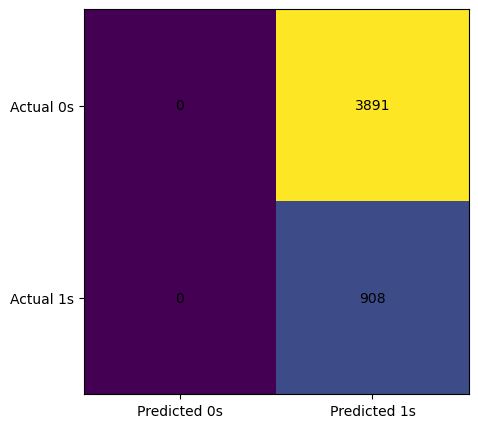

In [13]:

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

# <span style="color:darkblue"> IV. Exercises </span>

<font size = "5">

Try it yourself

- Change the classification threshold
- How does this change the classification accuracy?
- Create a for-loop evaluating the accuracy over different thresholds


In [60]:
# Write your own code
bins_y = [0,0.17551, 1]
labels_y = [0,1]

predicted_labels = pd.cut(vec_probabilities,
                              bins = bins_y,
                              right = True,
                              labels = labels_y)
cm = confusion_matrix(y_test, predicted_labels)
cm


array([[   0, 3891],
       [   0,  908]])

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

thresholds = np.arange(0.0, 1.05, 0.01)  # 从 0.0 到 1.0，每隔 0.05 一个阈值
accuracies = []  # 存储每个阈值的准确率

for threshold in thresholds:
    # 根据当前阈值生成预测标签
    predicted_labels = (vec_probabilities >= threshold).astype(int)
    
    # 计算混淆矩阵
    cm = confusion_matrix(y_test, predicted_labels)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:\n", cm)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, predicted_labels)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy}\n")

# 输出每个阈值对应的准确率
for threshold, accuracy in zip(thresholds, accuracies):
    print(f"Threshold: {threshold:.2f} - Accuracy: {accuracy:.4f}")

Threshold: 0.0
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.01
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.02
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.03
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.04
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.05
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.06
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.07
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.08
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.09
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 0.18920608460095853

Threshold: 0.1
Confusion Matrix:
 [[   0 3891]
 [   0  908]]
Accuracy: 

<font size = "5">

Try it yourself

- Add interactions between "Own rooms" and other independent variables
- Does this improve the classification accuracy?
 


In [64]:
# 定义公式，包含 Own_rooms 与其他变量的交互项
formula = 'request_loan ~ owns_house * (received_info + home_numrooms)'

# 使用 patsy 生成设计矩阵
y, X = patsy.dmatrices(formula, dataset, return_type='dataframe')
y = y.values.ravel()  # 将 y 转为一维数组

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测并计算准确率
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy with Interactions: {accuracy}")



Classification Accuracy with Interactions: 0.8097222222222222


<font size = "5">